In [133]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import cm
from random import randint
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from IPython.display import display_html
def display_side_by_side(*args): #from https://github.com/dinotuku/MovieLens/blob/master/exploration/data-exploration.ipynb
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

In [4]:
columns_name=['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('/content/drive/MyDrive/ml-100k/u.data', sep = '\t', names=columns_name)
columns_name=['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('/content/drive/MyDrive/ml-100k/u.user', sep = '|', names=columns_name)
columns_name=['item_id', 'title', 'release', 'video_release', 'IMDB_URL','unknown',
                 'Action', 'Adventure', 'Animation', 'Children\'s','Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir','Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi','Thriller', 'War', 'Western']
items = pd.read_csv('/content/drive/MyDrive/ml-100k/u.item', sep = '|',
                                                    encoding='latin-1', names=columns_name)

items = items.drop(['video_release', 'IMDB_URL'], axis=1)
items['release'] = items['release'].replace(np.nan,'20-Sep-1996')
users['gender'] = users['gender'].replace('F',0).replace('M',1)
display_side_by_side(data.head(), users.head(), items.head(3))

user_id 
 item_id 
 rating 
 timestamp 
 
 
 
 
 0 
 196 
 242 
 3 
 881250949 
 
 
 1 
 186 
 302 
 3 
 891717742 
 
 
 2 
 22 
 377 
 1 
 878887116 
 
 
 3 
 244 
 51 
 2 
 880606923 
 
 
 4 
 166 
 346 
 1 
 886397596 
 
 
 
 
 
 
 user_id 
 age 
 gender 
 occupation 
 zip_code 
 
 
 
 
 0 
 1 
 24 
 1 
 technician 
 85711 
 
 
 1 
 2 
 53 
 0 
 other 
 94043 
 
 
 2 
 3 
 23 
 1 
 writer 
 32067 
 
 
 3 
 4 
 24 
 1 
 technician 
 43537 
 
 
 4 
 5 
 33 
 0 
 other 
 15213 
 
 
 
 
 
 
 item_id 
 title 
 release 
 unknown 
 Action 
 Adventure 
 Animation 
 Children's 
 Comedy 
 Crime 
 Documentary 
 Drama 
 Fantasy 
 Film-Noir 
 Horror 
 Musical 
 Mystery 
 Romance 
 Sci-Fi 
 Thriller 
 War 
 Western 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 01-Jan-1995 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 2 
 GoldenEye (1995) 
 01-Jan-1995 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 2 
 3 
 Four Rooms (1995) 
 01-Jan-1995 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0

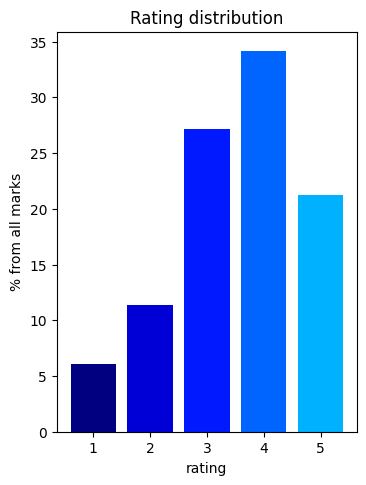

55.375 % : more then 3
44.625 % : 3 or less


In [188]:
#explore data dataset

result = [100*el/len(data)
                  for el in list(data.groupby(['rating'])['rating'].count())]

fig = plt.figure(figsize =(3, 4))
ax = fig.add_axes([1, 1, 1, 1])
ax.bar([i for i in range(1,6)], result, color = [cm.jet(x) for x in np.linspace(0.0, 0.3, 5)])
plt.title("Rating distribution")
plt.xlabel('rating')
plt.ylabel('% from all marks')
plt.savefig('rating_distr.png', bbox_inches='tight')

plt.show()
print(f"{100*len(data[data['rating']>3])/len(data)} % : more then 3\n\
{100*len(data[data['rating']<=3])/len(data)} % : 3 or less")

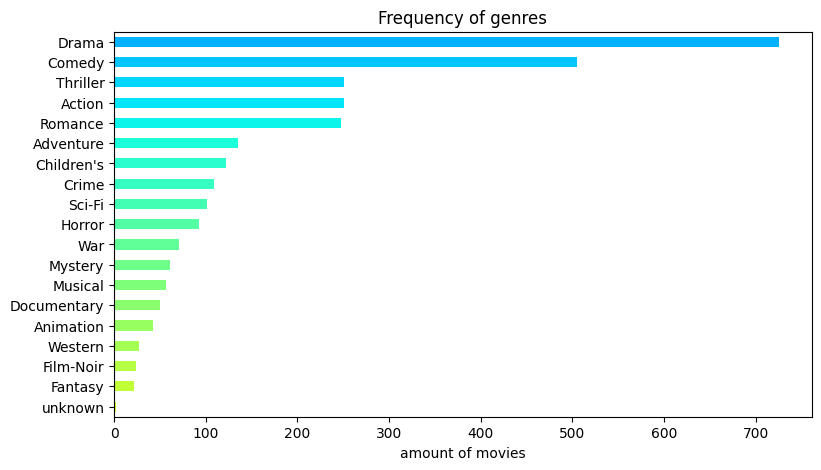

In [189]:
#explore items dataset

result = np.sum(items.drop(['item_id','title', 'release'], axis=1), axis=0)
result = result.sort_values()

fig = plt.figure(1, figsize=(9,5))
result.plot(kind = 'barh', color = [cm.jet(x) for x in np.linspace(0.6, 0.3, 19)])
plt.title("Frequency of genres")
plt.xlabel('amount of movies')
plt.savefig('genre_distr.png', bbox_inches='tight')

plt.show()

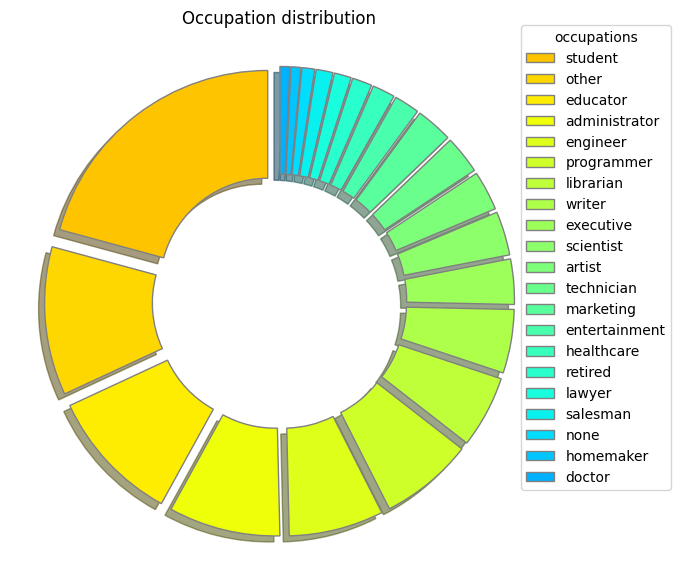

In [197]:
#explore users dataset

result = users.groupby('occupation').size().sort_values()
values = list(result.values)
values.reverse()
labels = list(result.index)
labels.reverse()

fig, ax = plt.subplots(figsize =(9,7))
ax.pie(values, labels = labels,
       startangle = 90, labeldistance = None, shadow = True,
       colors = [cm.jet(x) for x in np.linspace(0.7, 0.3, 21)],
       wedgeprops = { 'linewidth' : 1, 'edgecolor' : "gray", 'width' : 0.5},
       explode =  [0.09]*21)
fig.legend(title = "occupations", bbox_to_anchor =(0.455, 0, 0.5, 0.9))
plt.title("Occupation distribution")
plt.savefig('occup_distr.png', bbox_inches='tight')

plt.show()

In [5]:
data.to_csv('data_ds.csv', index=False)
users.to_csv('users_ds.csv', index=False)
items.to_csv('items_ds.csv', index=False)